In [4]:
import pandas as pd 
import pickle 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, auc, roc_curve, precision_recall_curve

In [2]:
pipe = pickle.load(open('pipe.pkl','rb'))

X_test = pd.read_csv("test.csv")
y = pd.read_csv("train.csv")
y_true = y['is_promoted']

y_true_filtered = y_true.iloc[:23490]

In [3]:
y_preds2 = pipe.predict(X_test)
scores = accuracy_score(y_true_filtered, y_preds2)
print(scores)

cr2 = classification_report(y_true_filtered, y_preds2)
print(cr2)

0.7249893571732652
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     21502
           1       0.08      0.22      0.12      1988

    accuracy                           0.72     23490
   macro avg       0.50      0.50      0.48     23490
weighted avg       0.84      0.72      0.78     23490



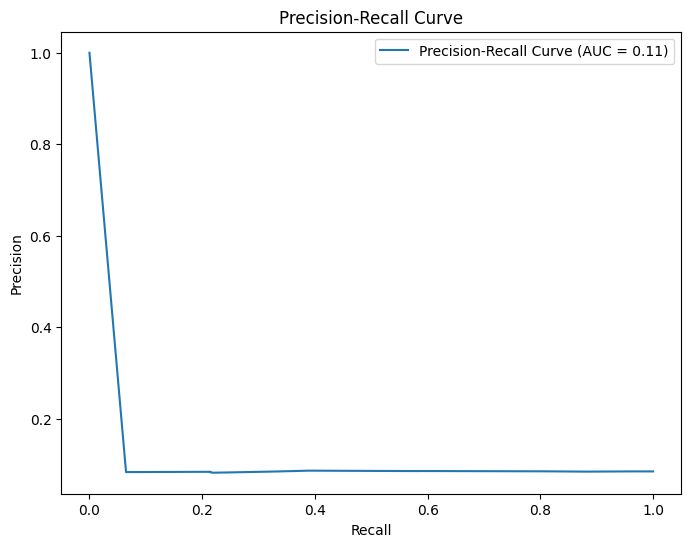

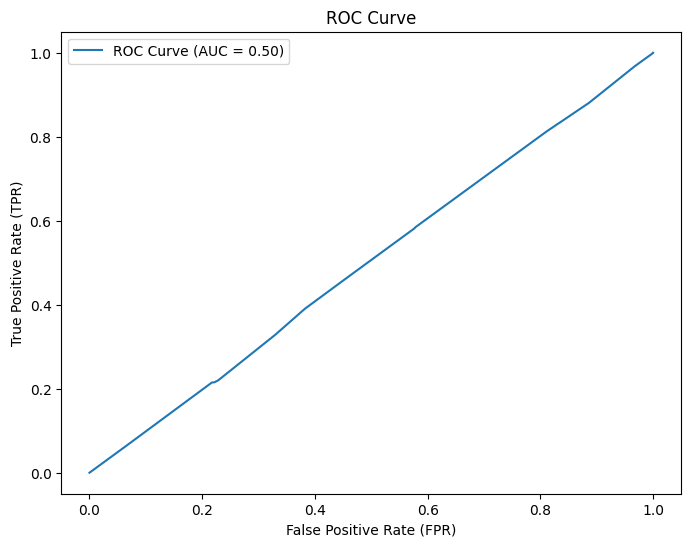

In [6]:
y_preds2_probs = pipe.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_true_filtered, y_preds2_probs)
auc_pr = auc(recall, precision)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_true_filtered, y_preds2_probs)
auc_roc = auc(fpr, tpr)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()